# Home task: KNN Classification

1. `iris` dataset
    - load `iris` dataset
    - split to train and test
    - train KNN classifiers for different `K`
    - choose the best `K` determined on test set
    

2. synthetic dataset
    - generrate synthetic dataset
    - split to train and test
    - train KNN regressors for different `K`
    - choose the best `K` determined on test set
    - visualize the decision boundary 





## `Iris` dataset 

### Loading dataset

In [23]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_iris

np.random.seed = 2021
iris = load_iris()

print ('data contains:',iris.keys())
X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']

df_iris= pd.DataFrame(X, columns=feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


### Splitting dataset into train and test

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

### Normalizing features

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Finding best k

In [26]:
from sklearn.neighbors import KNeighborsClassifier

k_values = range(1, 20)
val_scores = []  

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    val_scores.append(score)

k_best = k_values[np.argmax(val_scores)]
score_best = val_scores[k_best-1]
print("Validation scores: ", val_scores)
print (f'The best k = {k_best} , score = {score_best}')

Validation scores:  [0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667]
The best k = 5 , score = 0.9666666666666667


### Predicting results

In [27]:
knn_best = KNeighborsClassifier(n_neighbors=k_best)
knn_best.fit(X_train, y_train)
n = np.random.randint(0, len(X_test))
y_pred = knn_best.predict([X_test[n]])
print (f'Predicted label: {y_pred[0]}')
print (f'Actual label: {y_test[n]}')

Predicted label: 1
Actual label: 1


## Synthetic dataset

### Generating dataset

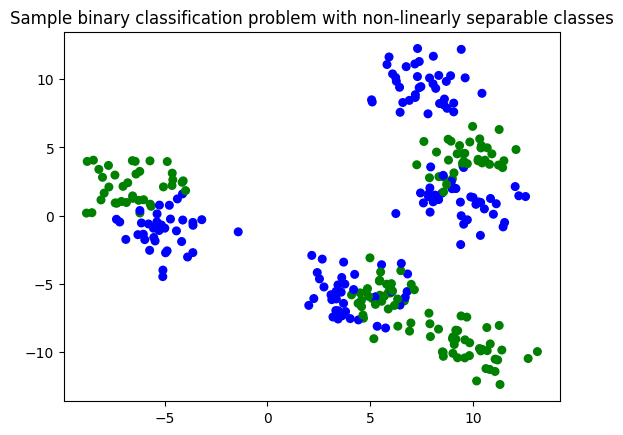

In [28]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)

y_D2 = y_D2 % 2

plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)

### Splitting dataset into train and test

In [29]:
X_D2_train, X_D2_test, y_D2_train, y_D2_test = train_test_split(X_D2, y_D2, test_size=0.2, random_state=2021)

### Normalizing features

In [30]:
scaler = MinMaxScaler()
X_D2_train = scaler.fit_transform(X_D2_train)
X_D2_test = scaler.transform(X_D2_test)

### Finding best k

In [31]:
from sklearn.neighbors import KNeighborsRegressor

k_values = range(1, 20)
val_scores = []  

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_D2_train, y_D2_train)
    score = knn.score(X_D2_test, y_D2_test)
    val_scores.append(score)

k_best = k_values[np.argmax(val_scores)]
score_best = val_scores[k_best-1]
print("Validation scores: ", val_scores)
print (f'The best k = {k_best} , score = {score_best}')

Validation scores:  [0.2592592592592592, 0.6127946127946128, 0.7605686494575383, 0.718013468013468, 0.7171717171717171, 0.7194163860830527, 0.6852882567168282, 0.6822390572390573, 0.6923972232614208, 0.6693602693602693, 0.6861173720677852, 0.6820052375607932, 0.6820273743350667, 0.6708582422868137, 0.6558174335952114, 0.6604061447811448, 0.6619015996178625, 0.6610134264455252, 0.6606881371424308]
The best k = 3 , score = 0.7605686494575383


### Predicting results

In [32]:
knn_best = KNeighborsRegressor(n_neighbors=k_best)
knn_best.fit(X_D2_train, y_D2_train)
n = np.random.randint(0, len(X_D2_test))
y_pred = knn_best.predict([X_D2_test[n]])
print (f'Predicted label: {y_pred[0]}')
print (f'Actual label: {y_D2_test[n]}')

Predicted label: 0.0
Actual label: 0


### Visualizing the decision boundary

Call prediction for all grid values (precision of drawing = 0.01, you may configure to speed up e.g. precision=0.05)


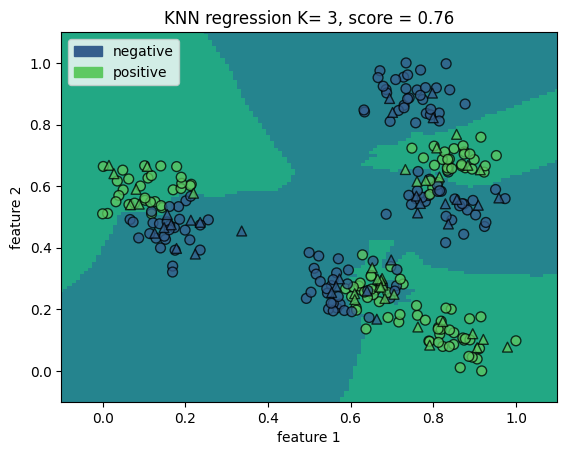

In [33]:
def plot_decision_boundary(clf, X_train, y_train, X_test=None, y_test= None, title=None, precision=0.01,plot_symbol_size = 50):

    # Create color maps
    from matplotlib.colors import  ListedColormap
    import matplotlib as mpl

    colors_for_areas= [mpl.cm.viridis(.45),mpl.cm.viridis(.6)]
    colors_for_points = [mpl.cm.viridis(.3),mpl.cm.viridis(.75)]
    cmap_light = ListedColormap(colors_for_areas)
    cmap_bold  = ListedColormap(colors_for_points)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = precision #.01  # step size in the mesh

    X= np.concatenate([X_train,X_test], axis=0)
    x1_min, x1_max = X[:, 0].min() - .1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - .1, X[:, 1].max() + 0.1
    # Creates grids of values
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, mesh_step_size),
                         np.arange(x2_min, x2_max, mesh_step_size))

    target_samples_grid= (np.c_[xx1.ravel(), xx2.ravel()])# 2-column ndarray # creates the all possible pairs
    print ('Call prediction for all grid values (precision of drawing = {}, you may configure to speed up e.g. precision=0.05)'.format(precision))
    Z = clf.predict(target_samples_grid)

    # Put the result into a color plot
    Z = Z.reshape(xx1.shape)
    plt.figure()
    plt.pcolormesh(xx1, xx2, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_train[:, 0], X_train[:, 1], s=plot_symbol_size, c=y_train.ravel(), cmap=cmap_bold, edgecolor = 'black',alpha=0.75)
    plt.scatter(X_test[:, 0], X_test[:, 1], marker='^', s=plot_symbol_size, c=y_test.ravel(), cmap=cmap_bold, edgecolor = 'black',alpha=0.75)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    import matplotlib.patches as mpatches
    patch0 = mpatches.Patch(color=colors_for_points[0], label='negative')
    patch1 = mpatches.Patch(color=colors_for_points[1], label='positive')
    plt.legend(handles=[patch0, patch1])
    plt.title(title)

    plt.xlabel('feature 1')
    plt.ylabel('feature 2')

    plt.show()

plot_decision_boundary(knn_best, X_D2_train, y_D2_train, X_D2_test, y_D2_test,
                               title='KNN regression K= {}, score = {:.2f}'.format(k_best, score_best), 
                               precision=0.01,plot_symbol_size = 50)